In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# models
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [71]:
data = pd.read_csv('../data/cardio_train.csv',sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [72]:
data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data["age"] = data["age"] / 365
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
data['age'] = data["age"].astype(int)
len(data)

68983

In [73]:
out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~out_filter2]

In [74]:
data.head(4)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479


ValueError: num must be an integer with 1 <= num <= 12, not 13

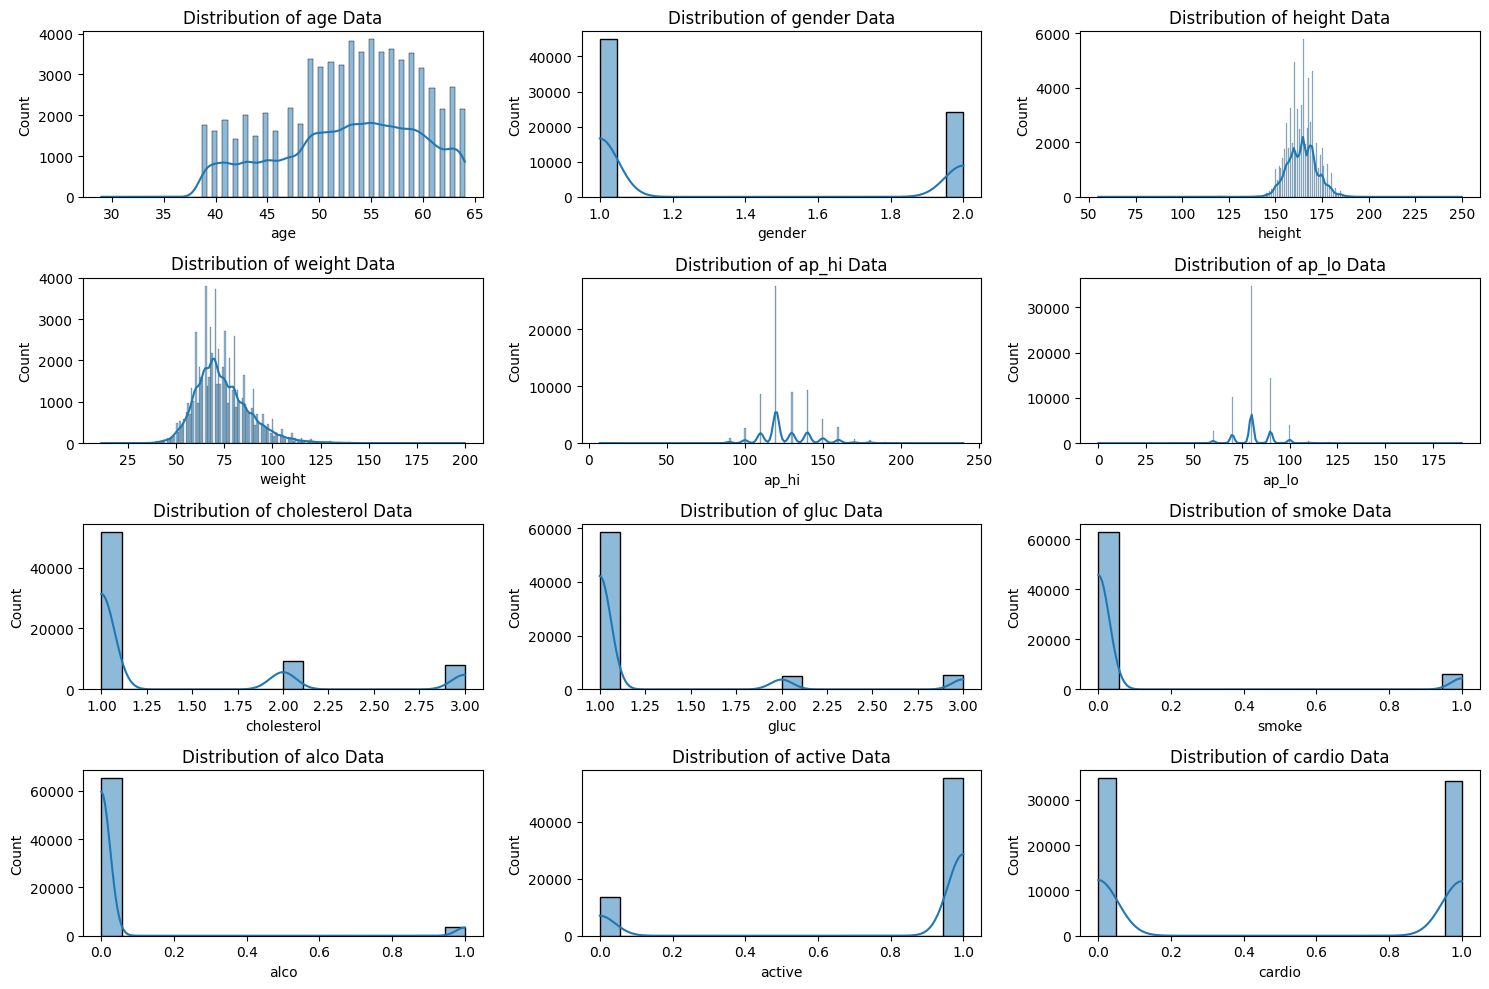

In [75]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68975 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68975 non-null  int64  
 1   gender       68975 non-null  int64  
 2   height       68975 non-null  int64  
 3   weight       68975 non-null  float64
 4   ap_hi        68975 non-null  int64  
 5   ap_lo        68975 non-null  int64  
 6   cholesterol  68975 non-null  int64  
 7   gluc         68975 non-null  int64  
 8   smoke        68975 non-null  int64  
 9   alco         68975 non-null  int64  
 10  active       68975 non-null  int64  
 11  cardio       68975 non-null  int64  
 12  bmi          68975 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


In [76]:
X = data.drop('cardio',axis=1)
y = data['cardio']

In [77]:
X_train, temp_X, y_train, temp_y = train_test_split(X,y,test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(temp_X,temp_y,test_size=0.5,random_state=42)

In [78]:
df = data
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
67193,51,1,163,69.0,180,80,1,1,0,0,0,25.970116
40598,60,2,170,107.0,120,80,1,1,0,0,1,37.024221
43391,52,2,180,71.0,110,70,1,1,0,1,0,21.913580
41338,60,2,174,90.0,160,100,3,1,1,1,1,29.726516
15894,63,1,162,87.0,150,90,2,1,0,0,1,33.150434
...,...,...,...,...,...,...,...,...,...,...,...,...
37736,50,1,160,51.0,120,80,1,1,0,0,0,19.921875
6357,50,1,162,66.0,120,80,1,1,0,0,1,25.148605
55680,61,1,156,76.0,190,100,1,1,0,0,1,31.229454
871,53,2,170,85.0,130,90,3,1,0,0,1,29.411765


d:\Heart-Failure\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


72.56

72.51

72.26

72.34

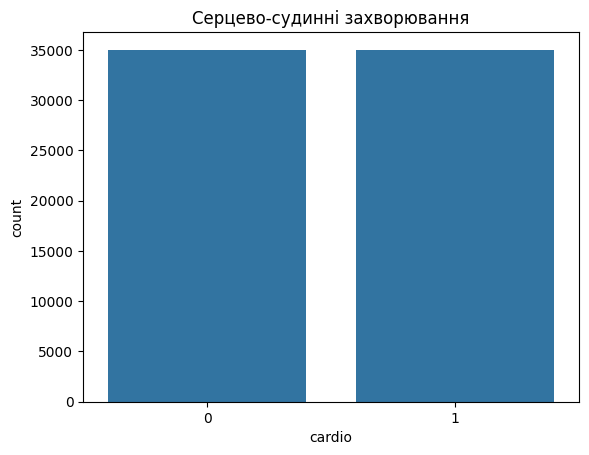

cardio
0    35021
1    34979
Name: count, dtype: int64

In [25]:
sns.countplot(data=df, x="cardio")
plt.title("Серцево-судинні захворювання")
plt.show()
df['cardio'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

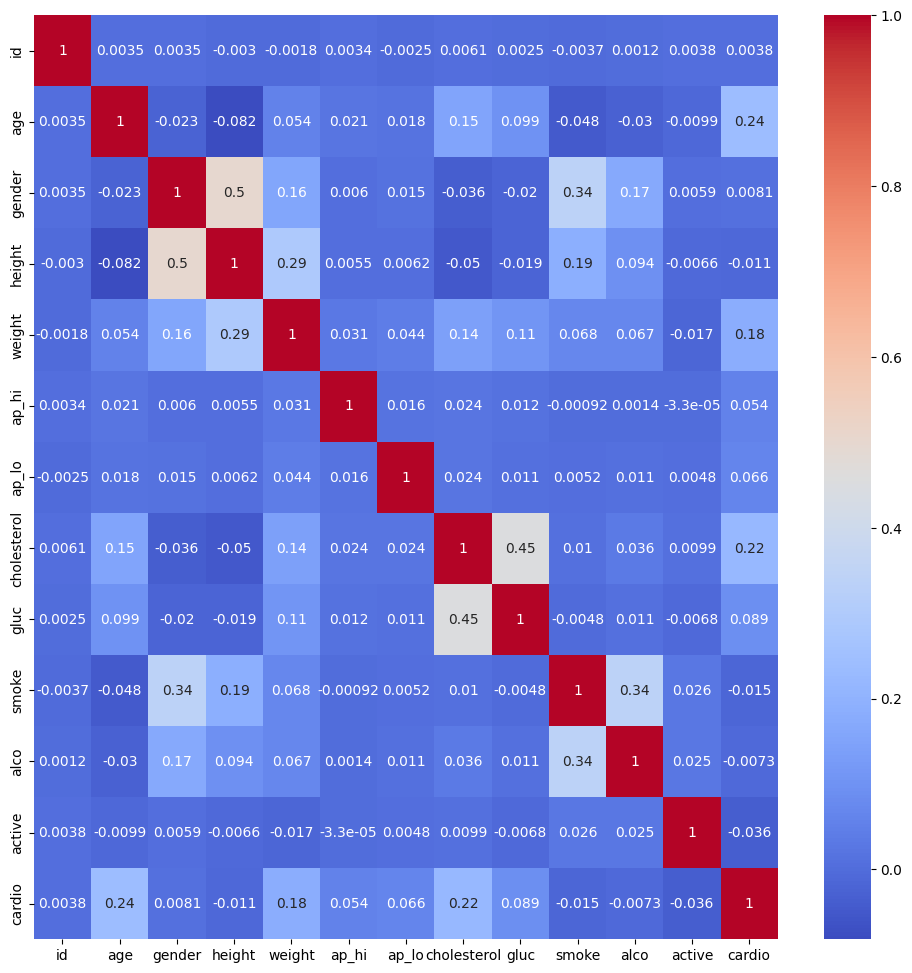

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show

In [42]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=20000, solver='lbfgs', random_state=42),
    # "Decision Tree": DecisionTreeClassifier(),
    # "Random Forest": RandomForestClassifier(),
    # "SVM": SVC(),
    # "KNN": KNeighborsClassifier(),
    # "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    # "AdaBoost": AdaBoostClassifier(),
    # "Naive Bayes": GaussianNB(),
    # "MLP Neural Network": MLPClassifier()
}

In [119]:
for name, model in models.items():
    if(name == "XGBoost"):
        print("+")
    else:
        print("-")
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
    print(classification_report(y_test, y_pred))

-
Training Logistic Regression...
Logistic Regression Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      5235
           1       0.75      0.68      0.71      5112

    accuracy                           0.73     10347
   macro avg       0.73      0.73      0.73     10347
weighted avg       0.73      0.73      0.73     10347

+
Training XGBoost...
XGBoost Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5235
           1       0.76      0.69      0.73      5112

    accuracy                           0.74     10347
   macro avg       0.74      0.74      0.74     10347
weighted avg       0.74      0.74      0.74     10347



In [80]:
mean_train = X_train.mean()
std_train = X_train.std()

X_train_scaled = (X_train - mean_train) / std_train
X_val_scaled = (X_val - mean_train) / std_train
X_test_scaled = (X_train - mean_train) / std_train

In [82]:
depths = [20, 37, 50]
models = {}  
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    models[depth] = model
    
    val_accuracy = accuracy_score(y_val, model.predict(X_val_scaled))
    train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
    print(f"Depth: {depth}, Train accuracy: {train_accuracy:.2f}, Validation accuracy: {val_accuracy:.2f}")


Depth: 20, Train accuracy: 0.44, Validation accuracy: 0.44
Depth: 37, Train accuracy: 0.44, Validation accuracy: 0.44
Depth: 50, Train accuracy: 0.44, Validation accuracy: 0.44


Обрано компонент: 4


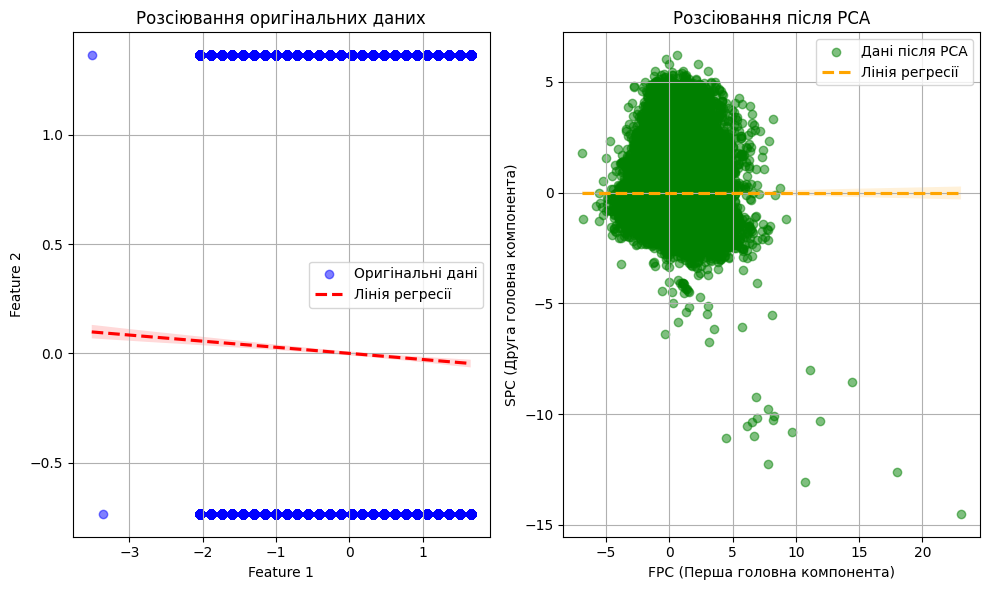

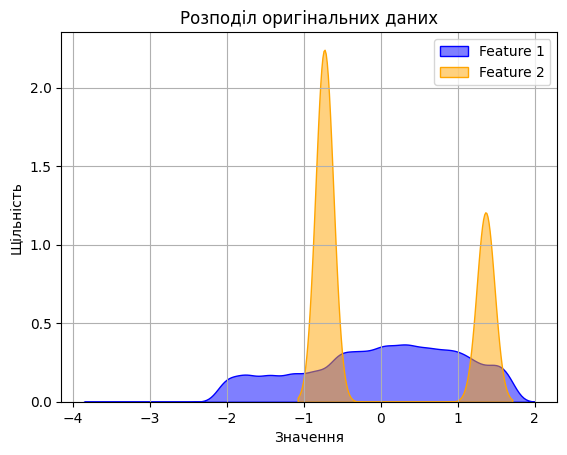

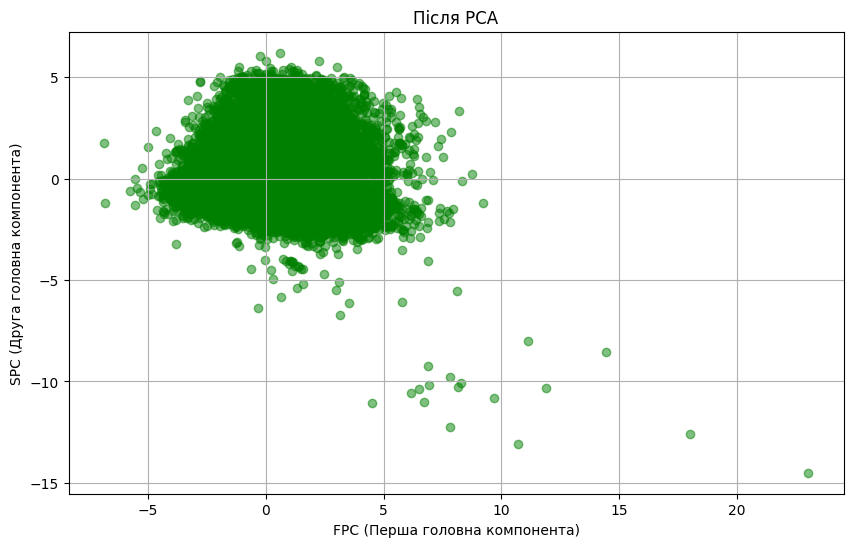

In [107]:
pca_original = PCA(n_components=0.50)
pca_original.fit(X_train_scaled)
x_pca = pca_original.fit_transform(X_train_scaled)

print(f"Обрано компонент: {pca_original.n_components_}")

plt.figure(figsize=(10, 6))  # Розмір графіка

plt.subplot(1, 2, 1)  # 1 рядок, 2 стовпці, 1 графік
plt.scatter(X_train_scaled.iloc[:, 0], X_train_scaled.iloc[:, 1], color='blue', alpha=0.5, label='Оригінальні дані')
sns.regplot(x=X_train_scaled.iloc[:, 0], y=X_train_scaled.iloc[:, 1], scatter=False, color='red', label='Лінія регресії', line_kws={'linestyle': '--'})
plt.title("Розсіювання оригінальних даних")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

# Графік розсіювання після PCA
plt.subplot(1, 2, 2)  # 1 рядок, 2 стовпці, 2 графік
plt.scatter(x_pca[:, 0], x_pca[:, 1], color='green', alpha=0.5, label='Дані після PCA')
sns.regplot(x=x_pca[:, 0], y=x_pca[:, 1], scatter=False, color='orange', label='Лінія регресії', line_kws={'linestyle': '--'})
plt.title("Розсіювання після PCA")
plt.xlabel('FPC (Перша головна компонента)')
plt.ylabel('SPC (Друга головна компонента)')
plt.legend()
plt.grid()

plt.tight_layout()  # Додає відстань між графіками
plt.show()


sns.kdeplot(X_train_scaled.iloc[:, 0], label='Feature 1', color='blue', fill=True, alpha=0.5)
sns.kdeplot(X_train_scaled.iloc[:, 1], label='Feature 2', color='orange', fill=True, alpha=0.5)
plt.title("Розподіл оригінальних даних")
plt.xlabel('Значення')
plt.ylabel('Щільність')
plt.legend()
plt.grid()
plt.show()  # Показати перший графік

# Крок 3: Графік розподілу після PCA
plt.figure(figsize=(10, 6))  # Розмір графіка
plt.scatter(x_pca[:, 0], x_pca[:, 1], c='green', alpha=0.5)
plt.title("Після PCA")
plt.xlabel('FPC (Перша головна компонента)')
plt.ylabel('SPC (Друга головна компонента)')
plt.grid()
plt.show()  # Показати другий графік


In [106]:
noise = np.random.uniform(-0.1,0.1, X_train_scaled.shape)
X_train_noisy = X_train_scaled + noise

Обранно компонент: 10


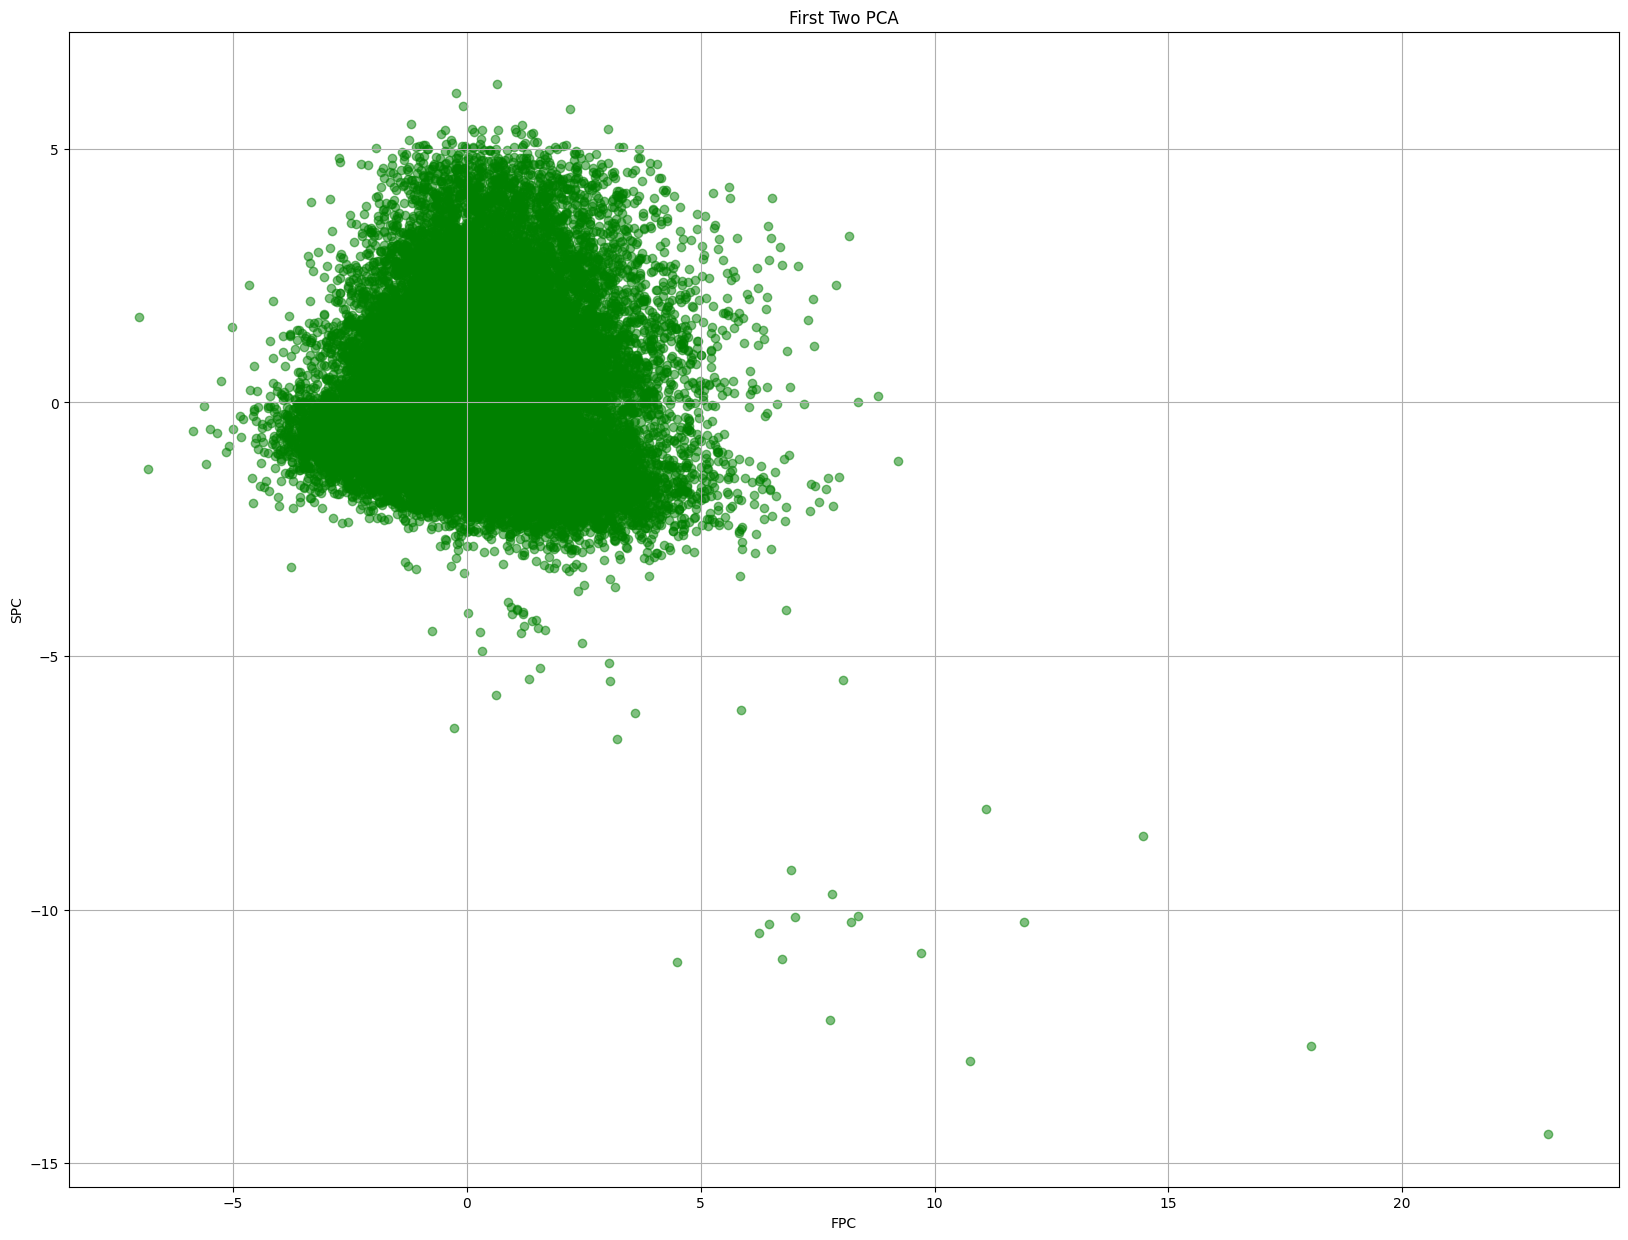

In [93]:
pca_noisy = PCA(n_components=0.95)
pca_noisy.fit(X_train_scaled)
x_pcaa = pca_noisy.fit_transform(X_train_noisy)

print(f"Обранно компонент: {pca_noisy.n_components_}")
plt.figure(figsize=(20,15))
plt.scatter(x_pcaa[:,0],x_pcaa[:,1], c='green',alpha=0.5)
plt.title("First Two PCA")
plt.xlabel('FPC')
plt.ylabel('SPC')
plt.grid()
plt.show()

In [94]:
n_components = np.argmax(np.cumsum(pca_noisy.explained_variance_ratio_)>=0.95)+1
pca = PCA(n_components=n_components)
X_train_denoised = pca.inverse_transform(pca.fit_transform(X_train_noisy))

In [98]:
for depth in depths:
    
    model_original = DecisionTreeClassifier(max_depth=depth,random_state=42)
    model_original.fit(X_train_scaled, y_train)
    # Модель для зашумлених даних
    model_noisy = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_noisy.fit(X_train_noisy, y_train)
    
    # Модель для знешумлених даних
    model_denoised = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_denoised.fit(X_train_denoised, y_train)  # Використовуємо знешумлені дані
    
    train_original = accuracy_score(y_train, model_original.predict(X_train_scaled))
    val_original = accuracy_score(y_val, model_original.predict(X_val_scaled))
    
    # Оцінка точності для зашумлених даних
    train_accuracy_noisy = accuracy_score(y_train, model_noisy.predict(X_train_noisy))
    val_accuracy_noisy = accuracy_score(y_val, model_noisy.predict(X_val_scaled))
    
    # Оцінка точності для знешумлених даних
    train_accuracy_denoised = accuracy_score(y_train, model_denoised.predict(X_train_denoised))
    val_accuracy_denoised = accuracy_score(y_val, model_denoised.predict(X_val_scaled))
    
    # Виводимо результати для поточної глибини дерева
    print(f"Depth: {depth} | Original Train Accuracy: {train_original:.2f} | Noisy Train Accuracy: {train_accuracy_noisy:.2f} | Validation Accuracy: {val_accuracy_noisy:.2f}\n")
    
    print(f"Depth: {depth} | Denoised Train Accuracy: {train_accuracy_denoised:.2f} | Validation Accuracy: {val_accuracy_denoised:.2f}\n")

d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Depth: 20 | Original Train Accuracy: 0.87 | Noisy Train Accuracy: 0.91 | Validation Accuracy: 0.69

Depth: 20 | Denoised Train Accuracy: 0.90 | Validation Accuracy: 0.65



d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Depth: 37 | Original Train Accuracy: 0.98 | Noisy Train Accuracy: 1.00 | Validation Accuracy: 0.65

Depth: 37 | Denoised Train Accuracy: 0.99 | Validation Accuracy: 0.61

Depth: 50 | Original Train Accuracy: 0.98 | Noisy Train Accuracy: 1.00 | Validation Accuracy: 0.65

Depth: 50 | Denoised Train Accuracy: 1.00 | Validation Accuracy: 0.61



d:\Heart-Failure\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


<Axes: >

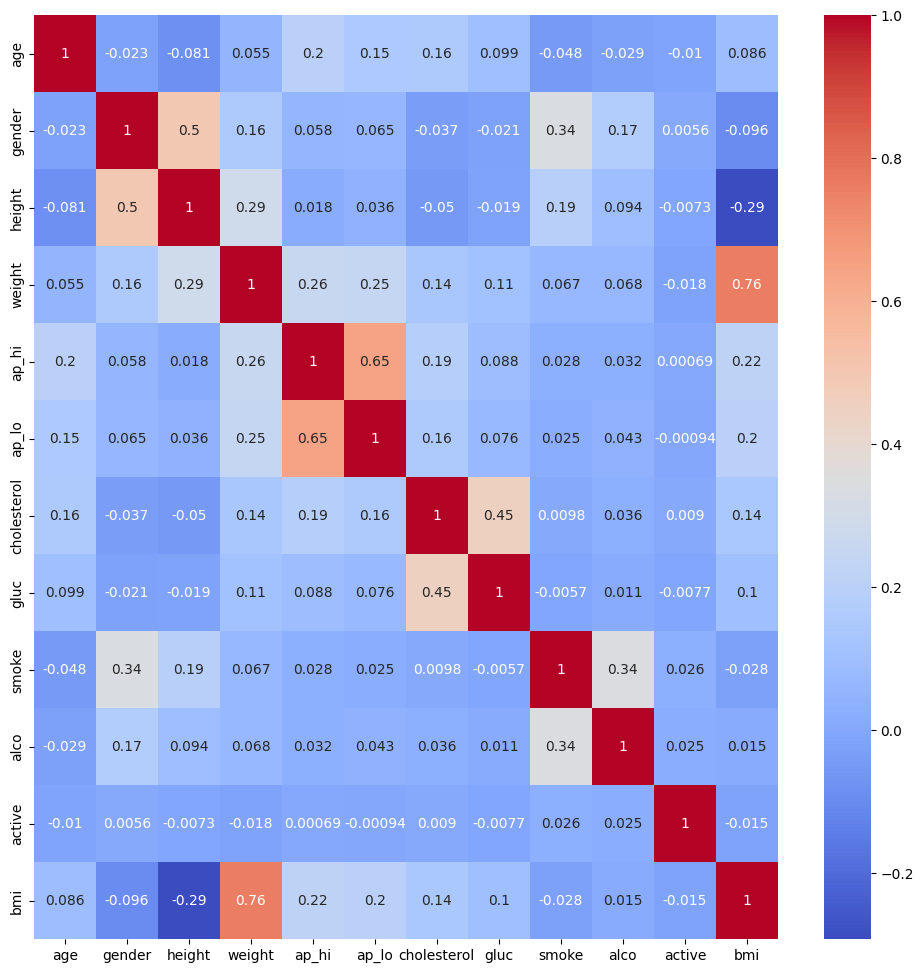

In [52]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(),annot= True,cmap = 'coolwarm')

In [133]:
data.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805


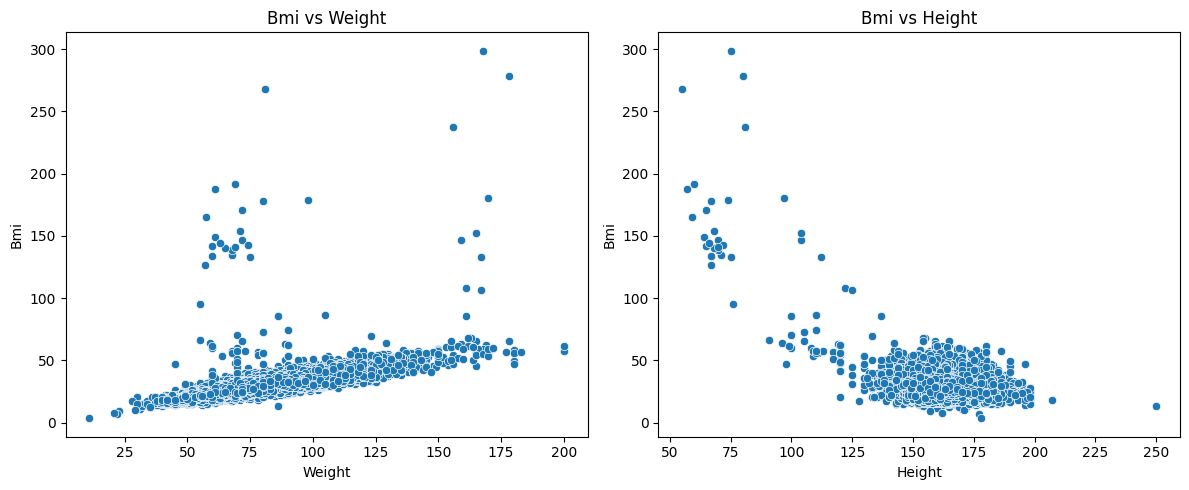

In [140]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='weight', y='bmi', data=df)
plt.title('Bmi vs Weight')
plt.xlabel('Weight')
plt.ylabel('Bmi')
plt.subplot(1, 2, 2)
sns.scatterplot(x='height', y='bmi', data=df)
plt.title('Bmi vs Height')
plt.xlabel('Height')
plt.ylabel('Bmi')


plt.tight_layout()
plt.show()

In [150]:
d = {1: 'women', 2:'men'}
data['gender'] = data['gender'].replace(d)

In [151]:
data.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,men,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,women,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,women,165,64.0,130,70,3,1,0,0,0,1,23.507805


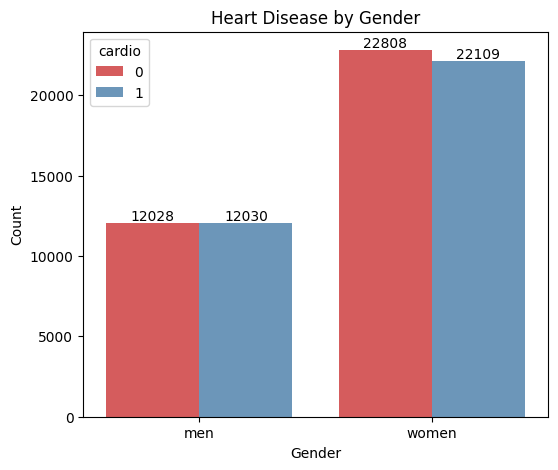

In [152]:

plt.figure(figsize=(6,5))
axis=sns.countplot(data=df, x='gender', hue='cardio', palette='Set1' , alpha=0.8)
axis.bar_label(axis.containers[0]);
axis.bar_label(axis.containers[1]);
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [166]:
df = data

In [167]:
df['smoke'].replace([0,1] , ["No" , "Yes"] , inplace=True)
df['gluc'].replace([1,2,3], ["normal", "above normal","well above normal"], inplace=True)
df['alco'].replace({0: "Doesn't Drink", 1: "Drink"} , inplace=True )
df['active'].replace({0: 'Inactive', 1: 'Active'} , inplace=True )
df['cardio'].replace({0: 'No Disease', 1: 'Has Disease'} , inplace=True )
df['cholesterol'].replace([1,2,3] ,[" normal" ,  "above normal", "well above normal"],inplace=True)

In [168]:
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,men,168,62.0,110,80,normal,normal,No,Doesn't Drink,Active,No Disease,21.967120
1,55,women,156,85.0,140,90,well above normal,normal,No,Doesn't Drink,Active,Has Disease,34.927679
2,51,women,165,64.0,130,70,well above normal,normal,No,Doesn't Drink,Inactive,Has Disease,23.507805


Text(0, 0.5, 'Diastolic Blood Pressure (ap_lo)')

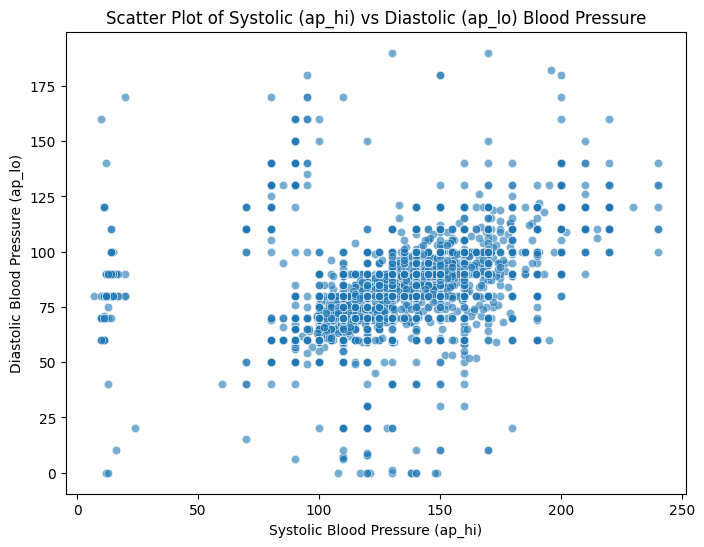

In [170]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(x="ap_hi", y="ap_lo", data=df,  alpha=0.6)

plt.title("Scatter Plot of Systolic (ap_hi) vs Diastolic (ap_lo) Blood Pressure")
plt.xlabel("Systolic Blood Pressure (ap_hi)")
plt.ylabel("Diastolic Blood Pressure (ap_lo)")

In [171]:
def categorize_blood_pressure(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Normal'
    elif 120 <= ap_hi < 140 or 80 <= ap_lo < 90:
        return 'Prehypertension'
    elif 140 <= ap_hi < 160 or 90 <= ap_lo < 100:
        return 'Hypertension Stage 1'
    elif 160 <= ap_hi or ap_lo >= 100:
        return 'Hypertension Stage 2'
    elif ap_hi >= 180 or ap_lo >= 120:
        return 'Hypertensive Crisis'
        
df['blood_pressure_category'] = df.apply(lambda row: categorize_blood_pressure(row['ap_hi'], row['ap_lo']), axis=1)
df[['ap_hi', 'ap_lo', 'blood_pressure_category']].head(10)

,ap_hi,ap_lo,blood_pressure_category
0,110,80,Prehypertension
1,140,90,Hypertension Stage 1
2,130,70,Prehypertension
3,150,100,Hypertension Stage 1
4,100,60,Normal
5,120,80,Prehypertension
6,130,80,Prehypertension
7,130,90,Prehypertension
8,110,70,Normal
9,110,60,Normal


<Axes: >

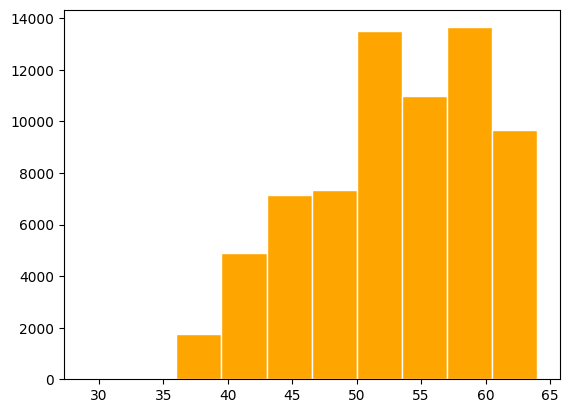

In [175]:
df['age'].hist(edgecolor="white",grid=False, color="orange")

Text(0, 0.5, 'Count')

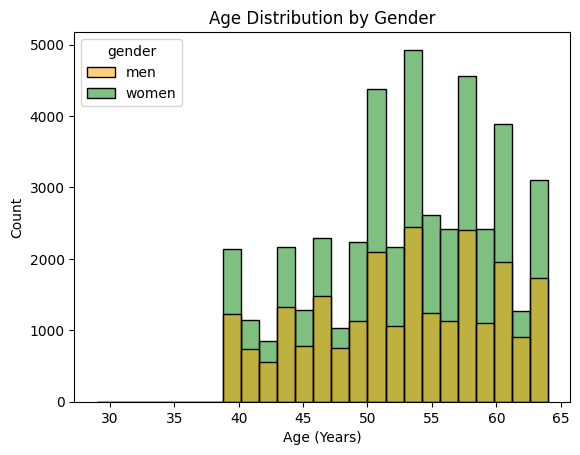

In [178]:
sns.histplot(data=df, x='age', hue='gender', kde=False, bins=25, palette=["orange" ,"green"])

plt.title('Age Distribution by Gender')
plt.xlabel('Age (Years)')
plt.ylabel('Count')

In [180]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,blood_pressure_category
0,50,men,168,62.0,110,80,normal,normal,No,Doesn't Drink,Active,No Disease,21.967120,Prehypertension
1,55,women,156,85.0,140,90,well above normal,normal,No,Doesn't Drink,Active,Has Disease,34.927679,Hypertension Stage 1
2,51,women,165,64.0,130,70,well above normal,normal,No,Doesn't Drink,Inactive,Has Disease,23.507805,Prehypertension
3,48,men,169,82.0,150,100,normal,normal,No,Doesn't Drink,Active,Has Disease,28.710479,Hypertension Stage 1
4,47,women,156,56.0,100,60,normal,normal,No,Doesn't Drink,Inactive,No Disease,23.011177,Normal


In [181]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Wightloss'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overwight'
    elif 30 <= bmi < 35:
        return 'Obesity class 1'
    elif 35<= bmi < 40:
        return 'Obesity class 2'
    else: 
        return 'Extreme Obesity'

df['bmi'] = df['bmi'].apply(categorize_bmi)

In [182]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,blood_pressure_category
0,50,men,168,62.0,110,80,normal,normal,No,Doesn't Drink,Active,No Disease,Normal,Prehypertension
1,55,women,156,85.0,140,90,well above normal,normal,No,Doesn't Drink,Active,Has Disease,Obesity class 1,Hypertension Stage 1
2,51,women,165,64.0,130,70,well above normal,normal,No,Doesn't Drink,Inactive,Has Disease,Normal,Prehypertension
3,48,men,169,82.0,150,100,normal,normal,No,Doesn't Drink,Active,Has Disease,Overwight,Hypertension Stage 1
4,47,women,156,56.0,100,60,normal,normal,No,Doesn't Drink,Inactive,No Disease,Normal,Normal


In [183]:
df_grouped = df.groupby("cholesterol")["bmi"].value_counts()
df_grouped

cholesterol        bmi            
 normal            Normal             21024
                   Overwight          18602
                   Obesity class 1     7919
                   Obesity class 2     2573
                   Extreme Obesity     1082
                   Wightloss            534
above normal       Overwight           3455
                   Normal              2595
                   Obesity class 1     2081
                   Obesity class 2      794
                   Extreme Obesity      340
                   Wightloss             75
well above normal  Overwight           2681
                   Obesity class 1     1993
                   Normal              1917
                   Obesity class 2      874
                   Extreme Obesity      402
                   Wightloss             34
Name: count, dtype: int64

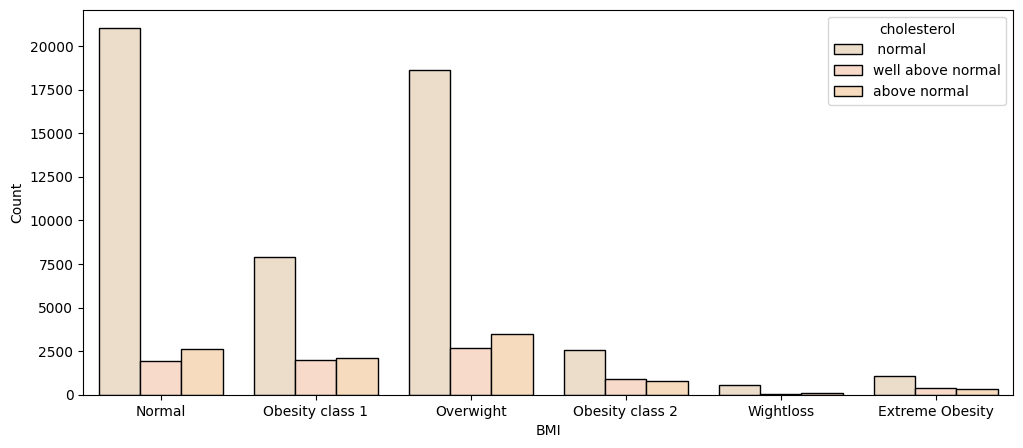

In [184]:
plt.figure(figsize=(12,5))  
sns.countplot(x="bmi", hue="cholesterol", data=df, palette=["#F1DEC6" , "#FFD7C4","#FFDBB5"],edgecolor="black"
)

plt.xlabel("BMI")
plt.ylabel("Count")


plt.show()